<a href="https://colab.research.google.com/github/Svetorus/Neuronets/blob/master/Neuronet_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Классификация изображений одежды  
  
  
Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.  
  
  В данном случае мы будем использовать High API от TensorFlow

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Импортируем Fashion MNIST датасет  
  
Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Анализ датасета  
  
Давайте посмотрим структуры полученного массива данных:

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

### Preprocess the data  
  
Давайте взглянем на конкретный пример изображений с помощью matplotlib:

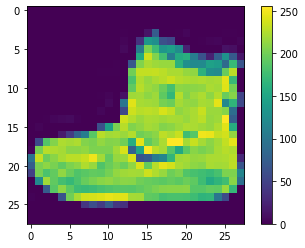

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

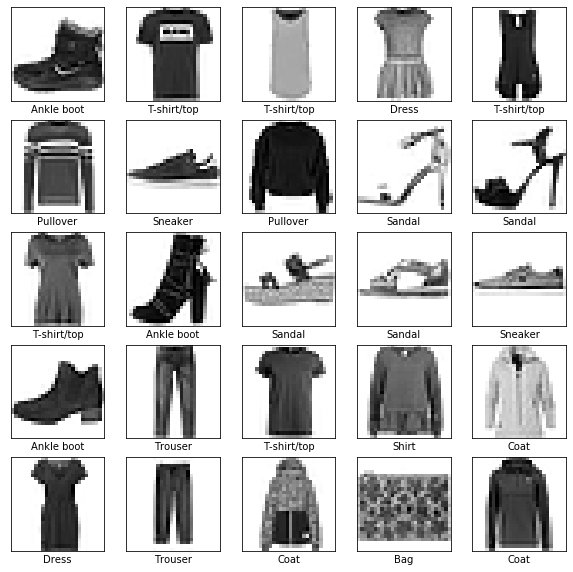

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

Фиксируем random в TensorFlow чтобы получить стабильные результаты, т.е. повторяемые результаты после обучения.

In [0]:
#tf.compat.v1.random.set_random_seed(42)
tf.random.set_seed(42)

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Build the model.
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

Первый слой, tf.keras.layers.Flatten, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.
Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

    Loss function — меряет как точно работает нейросеть.
    Optimizer — определяет способ корректировки весов.
    Metrics — определяет за какие характеристики будут отражаться в процессе обучения.



In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.
### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - model.fit:


In [0]:
model.fit(train_images, train_labels, epochs=5,batch_size=100)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.5420 - accuracy: 0.8141
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4026 - accuracy: 0.8571
Epoch 3/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3640 - accuracy: 0.8695
Epoch 4/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3352 - accuracy: 0.8791
Epoch 5/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3178 - accuracy: 0.8844


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3651 - accuracy: 0.8691

Test accuracy: 0.8691


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети -

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([3.1227177e-05, 1.1254333e-07, 6.3778512e-05, 6.9065891e-06,
       1.5197807e-05, 1.4786852e-02, 3.2516371e-04, 7.5885020e-02,
       2.0660772e-03, 9.0681970e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

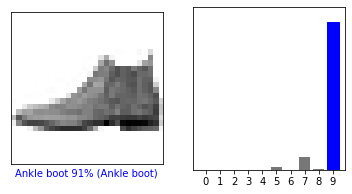

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

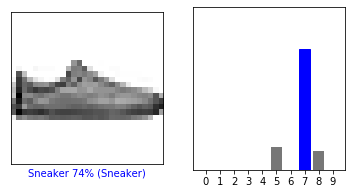

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

Давайте сделаем еще несколько предсказаний -

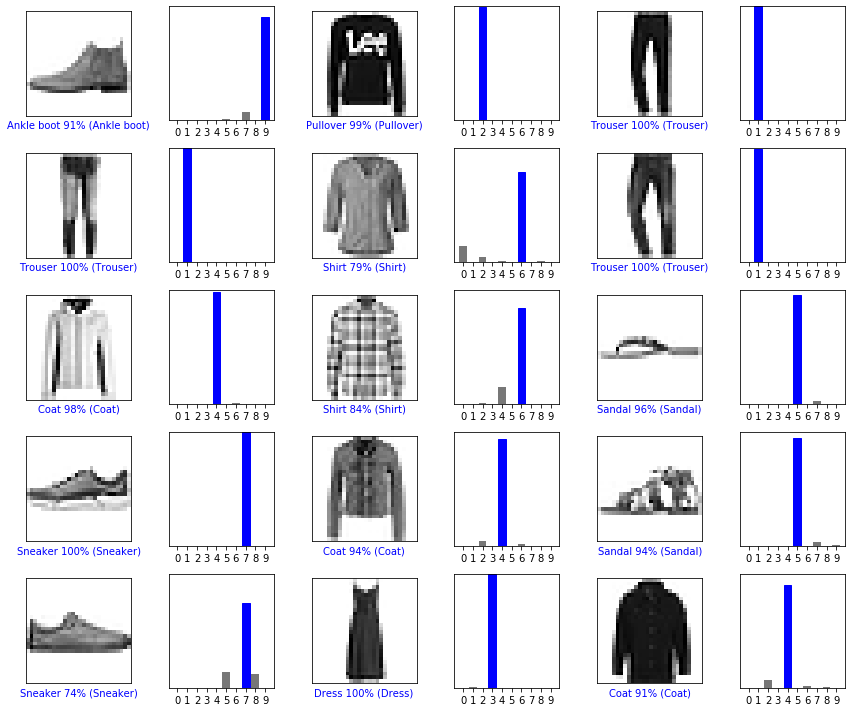

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()

### Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети -

In [0]:
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.0073966e-05 5.0699112e-09 9.9204445e-01 7.7841725e-07 5.4364004e-03
  4.7052556e-11 2.4576481e-03 2.3031371e-13 1.0472447e-05 1.0062855e-12]]


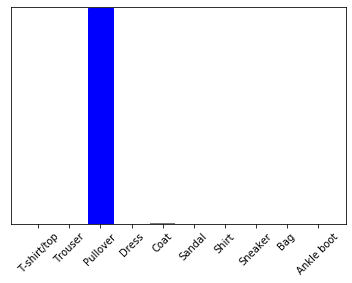

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [0]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

<font color='blue'>Вывод:</font>  
При увелечении слоев, эпох, число батчей мы получаем переобучение.  
Фиксация random в TensorFlow помогает получать стабильные результаты, и позволяет лучше сравнивать результаты обучения.